In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

Data Source: https://in.finance.yahoo.com/quote/005930.KS/history?period1=1540796400&period2=1572332400&interval=1d&filter=history&frequency=1d

##Dataset

In [0]:
dataframe=pd.read_csv('https://raw.githubusercontent.com/AnirbanMukherjeeXD/samsung-stock-price-prediction/master/Samsung_Stock_Data.csv').dropna()

#Formatting Date
dataframe['Date']=pd.to_datetime(dataframe['Date'],format='%Y-%m-%d')

dataframe.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-29,40850.0,41950.0,40550.0,41400.0,41017.843750,14460521.0
1,2018-10-30,41400.0,43000.0,41000.0,42350.0,41959.074219,14205190.0
2,2018-10-31,42900.0,43350.0,41700.0,42400.0,42008.613281,17621480.0
3,2018-11-01,42450.0,42950.0,42150.0,42150.0,41760.921875,13423132.0
4,2018-11-02,43050.0,44250.0,42800.0,44150.0,43742.460938,16517112.0


###Plot - High Values

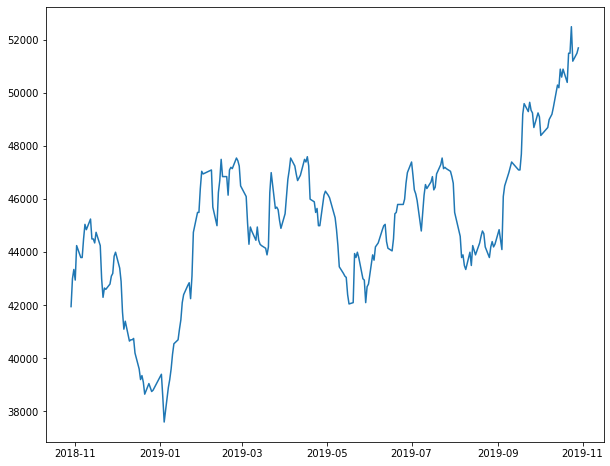

In [0]:
plt.figure(figsize=(10,8))
plt.plot(dataframe['Date'],dataframe['High'])
#plt.xlim(pd.Timestamp('2018-10-30'), pd.Timestamp('2019-04-30'))

##RNN

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import GRU, LSTM

Processing data

In [0]:
## Selecting High values
Y=dataframe['High'].values

In [0]:
#Lookback value
lag=10

## Turning into matrix (2D array)
YN=np.array([[j for j in Y[i:i+lag]] for i in range(0,len(Y)-lag+1)])

# XX is input, YY is output
XX,YY=YN[:,0:lag-1],YN[:,[lag-1]]

## Train test split
# xx is training input, xxt is testing input, yy is training output, yyt is testing output
xx,xxt,yy,yyt=train_test_split(XX,YY,test_size=0.2,shuffle=None)

#Reshaping into 3D array (as accepted by GRU)
XX=XX.reshape(XX.shape[0],XX.shape[1],1)
xx=xx.reshape(xx.shape[0],xx.shape[1],1)
xxt=xxt.reshape(xxt.shape[0],xxt.shape[1],1)

###GRU Model

In [0]:
model = Sequential()
model.add(GRU(300, input_shape=(lag-1,1),activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(200, activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(100, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam',metrics=['mse'])

In [0]:
history=model.fit(xx, yy, epochs=200, shuffle=False, validation_split=0.2, verbose=2)

Train on 149 samples, validate on 38 samples
Epoch 1/200
 - 4s - loss: 1952160172.6711 - mean_squared_error: 1952160172.6711 - val_loss: 1975458816.0000 - val_mean_squared_error: 1975458816.0000
Epoch 2/200
 - 0s - loss: 1820501118.2819 - mean_squared_error: 1820501118.2819 - val_loss: 1918340170.1053 - val_mean_squared_error: 1918340170.1053
Epoch 3/200
 - 0s - loss: 1693987534.1745 - mean_squared_error: 1693987534.1745 - val_loss: 1830798066.5263 - val_mean_squared_error: 1830798066.5263
Epoch 4/200
 - 0s - loss: 1543108878.6040 - mean_squared_error: 1543108878.6040 - val_loss: 1783019189.8947 - val_mean_squared_error: 1783019189.8947
Epoch 5/200
 - 0s - loss: 1433660233.0201 - mean_squared_error: 1433660233.0201 - val_loss: 1775797786.9474 - val_mean_squared_error: 1775797786.9474
Epoch 6/200
 - 0s - loss: 1305009256.8054 - mean_squared_error: 1305009256.8054 - val_loss: 1589734945.6842 - val_mean_squared_error: 1589734945.6842
Epoch 7/200
 - 0s - loss: 1053370489.1275 - mean_square

###Loss

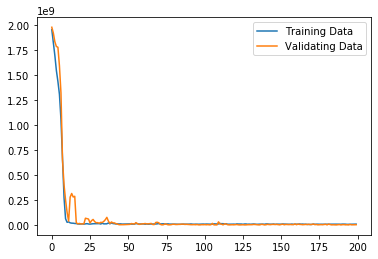

In [0]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.legend(['Training Data','Validating Data'])

###Training Data

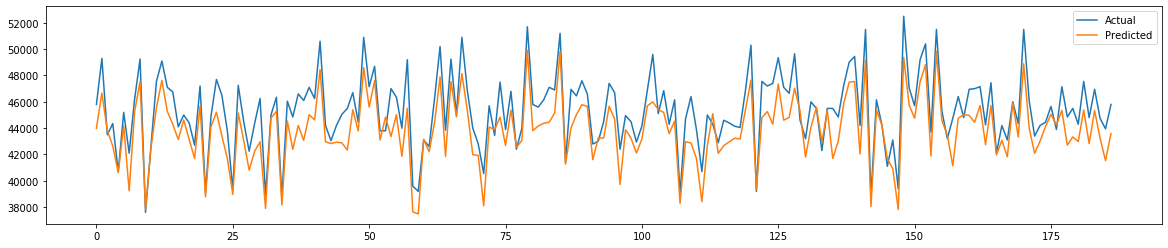

In [0]:
plt.figure(figsize=(20,4))
plt.plot(yy)
plt.plot(model.predict(xx))
plt.legend(['Actual','Predicted'])

###Testing Data

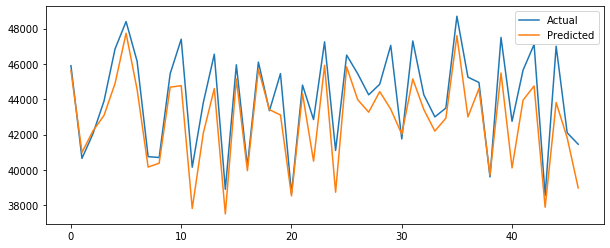

In [0]:
plt.figure(figsize=(10,4))
plt.plot(yyt)
plt.plot(model.predict(xxt))
plt.legend(['Actual','Predicted'])

###FULL DATA

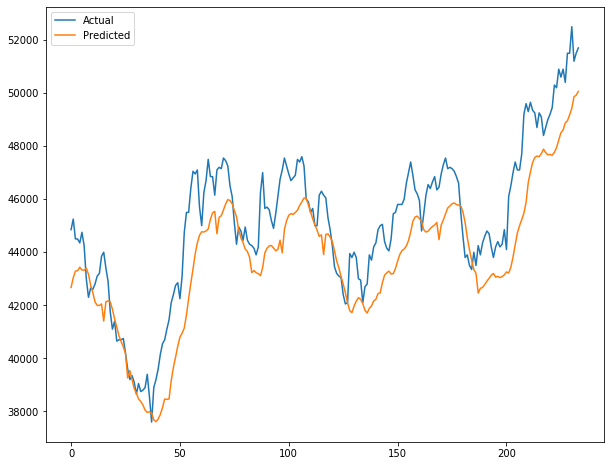

In [0]:
plt.figure(figsize=(10,8))
plt.plot(YY)
plt.plot(model.predict(XX))
plt.legend(['Actual','Predicted'])